# Supervised Learning -  K Nearest Neighbour

Do you remember the recipe for Machine Learning? Let me remind you once again!
* Define Problem : We start by defining the problem we are trying to solve. This can be as simple as prediction of your next semester's result based on your previous results.
* Collect Data : Next step is to collect relevant data based on the problem definition. This can be your grades in different semesters.
* Prepare Data : The data collected for our problem is preprocessed. This can be removing redundant grades and replacing the missing ones.
* Select Model(Algorithm) : After the data is ready, we proceed to select the machine learning model. The selection is based on the problem type e.g. classification, regression etc and the data that is available to us. The model can be linear regression model in our case.
* Train Model : The selected model is then trained to learn from the data we have collected.
* Evaluate Model : Final step is to evaluate the model that we have trained for accuracy and view the results.

This is exactly what we are going to do here.

## Step 1 - Define Problem

This is a real life dataset form a company called Capital Bike Share (https://www.capitalbikeshare.com/system-data).
They have open sourced their customer data. Our objective here is to use this data and predict whether a customer is a long term member or a casual user.

## Step 2 - Collect & Prepare Data

Step 2.1 - Import Data & Primary Data Analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#Reading the dataset in a dataframe using Pandas
df = pd.read_csv("data.csv") 

Now let us do some quick data analysis!

In [3]:
df.shape

(115597, 9)

In [4]:
df.head(10)

,Member type,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number
0,Member,1012,20/09/10 11:27,20/09/10 11:43,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742
1,Member,61,20/09/10 11:41,20/09/10 11:42,31209,1st & N St SE,31209,1st & N St SE,W00032
2,Member,2690,20/09/10 12:05,20/09/10 12:50,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993
3,Member,1406,20/09/10 12:06,20/09/10 12:29,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344
4,Member,1413,20/09/10 12:10,20/09/10 12:34,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883
5,Member,982,20/09/10 12:14,20/09/10 12:30,31109,7th & T St NW,31200,Massachusetts Ave & Dupont Circle NW,W00850
6,Member,930,20/09/10 12:15,20/09/10 12:30,31109,7th & T St NW,31105,14th & Harvard St NW,W00804
7,Member,1659,20/09/10 12:16,20/09/10 12:44,NaN,10th & U St NW,31208,M St & New Jersey Ave SE,W01084
8,Member,2496,20/09/10 12:18,20/09/10 13:00,NaN,5th & K St NW,31601,19th & East Capitol St SE,W00812
9,Member,1487,20/09/10 12:19,20/09/10 12:44,NaN,Minnesota Ave Metro/DOES,31603,1st & M St NE,W00803


In [5]:
df.describe()

,Duration,Start station number,End station number
count,115554.000000,115544.000000,115597.000000
mean,1254.765105,31266.230215,31268.042250
std,2914.829207,187.626473,186.194316
min,60.000000,31000.000000,31000.000000
25%,403.000000,31110.000000,31111.000000
50%,665.000000,31213.000000,31214.000000
75%,1120.000000,31301.000000,31238.000000
max,85644.000000,31805.000000,31805.000000


Step 2.2 - Finding & Imputing Missing Values

In [6]:
#finding missing values
df.isnull().sum()

Member type              0
Duration                43
Start date               0
End date                 0
Start station number    53
Start station            0
End station number       0
End station              0
Bike number              0
dtype: int64

In [7]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer = imputer.fit(df.iloc[:, 1:2])
df.iloc[:, 1:2] = imputer.transform(df.iloc[:, 1:2])

In [8]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer = imputer.fit(df.iloc[:, 4:5])
df.iloc[:, 4:5] = imputer.transform(df.iloc[:, 4:5])

In [9]:
df.isnull().sum()

Member type             0
Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
dtype: int64

Awesome! No we don't have any missing values. 

Step 2.3 - Data Visualization

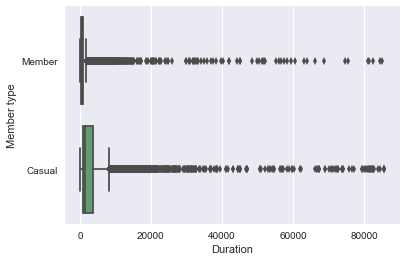

In [10]:
sns.boxplot(x = 'Duration', y = 'Member type', data = df)

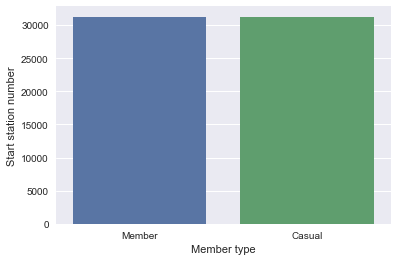

In [11]:
sns.barplot(x = 'Member type', y = 'Start station number', data = df)

## Step 3 - Modeling  

Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories

In [12]:
#Step 1 - Data Preprocessing. Conv text to numbers. 
#Label encoder is used to conv categories to num

from sklearn.preprocessing import LabelEncoder
categorical_variables = df.dtypes[df.dtypes == 'object'].index
categorical_variables

Index([u'Member type', u'Start date', u'End date', u'Start station',
       u'End station', u'Bike number'],
      dtype='object')

In [13]:
#Conv them using Label Encoder
le = LabelEncoder()
for var in categorical_variables:
    df[var] = le.fit_transform(df[var])

df.head()

,Member type,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number
0,1,1012,36274,35740,31208,85,31108,50,614
1,1,61,36275,35739,31209,32,31209,33,41
2,1,2690,36276,35750,31600,52,31100,31,836
3,1,1406,36277,35741,31600,52,31602,94,282
4,1,1413,36278,35744,31100,30,31201,21,734


In [14]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [15]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
knnClassifier = classifier.fit(X_train, y_train.ravel())
y_pred = knnClassifier.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
result = accuracy_score(y_test, y_pred)*100
result

83.68656897178151